In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_excel(r"C:\Users\aswin\Downloads\exoplanet_catalogue(1).xlsx")
df

Index(['name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impa

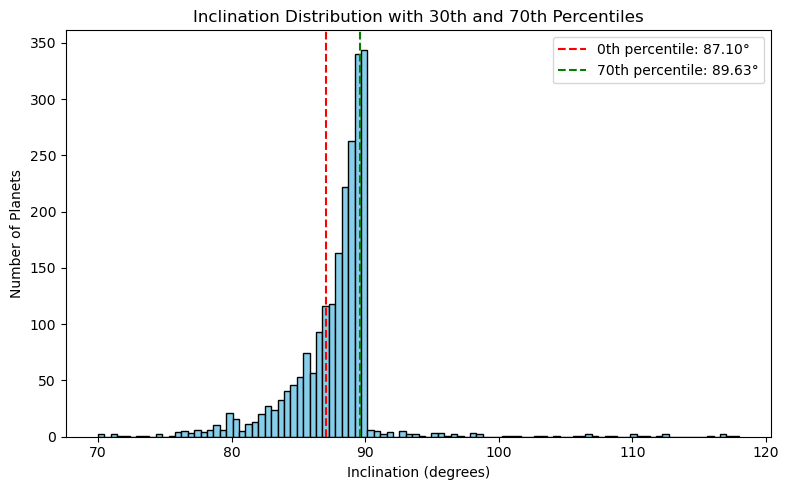

In [38]:
import matplotlib.pyplot as plt

# Filter inclination values
filtered_incl = df['inclination'][(df['inclination'] >= 70) & (df['inclination'] <= 120)]

# Compute 30th and 70th percentiles
q30 = filtered_incl.quantile(0.3)
q70 = filtered_incl.quantile(0.8)
del_i = q70 - q30
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(filtered_incl, bins=100, color='skyblue', edgecolor='k')
plt.xlabel("Inclination (degrees)")
plt.ylabel("Number of Planets")
plt.title("Inclination Distribution with 30th and 70th Percentiles")

# Add vertical lines for quantiles
plt.axvline(q30, color='red', linestyle='--', label=f'0th percentile: {q30:.2f}°')
plt.axvline(q70, color='green', linestyle='--', label=f'70th percentile: {q70:.2f}°')

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


## Estimate number of stars with planets

In [39]:
#Initial Parameters

# Total number of stars in the galaxy

N_stars = 2*(10**24)
allowed_inclination_interval = del_i


# Uniform distribution
pdf = allowed_inclination_interval/180
Stars_with_planet_obs = pdf*N_stars
Stars_with_planet_obs                                                   

2.8111111111111124e+22

## Estimate number of planets in the galaxy

In [40]:
# Group by star_name and calculate required values
results = df.groupby('star_name').apply(lambda g: pd.Series({
    'planet_count': len(g),
    
})).reset_index()

Average_planets_in_sol = results['planet_count'].sum()/len(results)
print("Average_Planets", Average_planets_in_sol)
Total_planets = Stars_with_planet_obs * Average_planets_in_sol
Total_planets

Average_Planets 1.3032625786163523


C:\Users\aswin\AppData\Local\Temp\ipykernel_21092\4186133885.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = df.groupby('star_name').apply(lambda g: pd.Series({


3.6636159154437474e+22